In [2]:
# import commands

import pandas as pd
import numpy as np
from scripts import project_functions_gc as pfg
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

%matplotlib inline

#### Seaborn figure theme

In [3]:
sns.set_theme(style="ticks",
              font_scale=1.3,
              palette='Pastel1'
             )
plt.rc('axes.spines', top=False, right=False)

# Exploratory Data Analysis

#### Research questions
- Does providing more mental health resources improve employees' mental health in the tech industry?
- Is there a relationship between employees' mental health and their knowledge of the mental health resources available?

#### Variables in this dataset
- **family_history:** Do you have a family history of mental illness?
- **treatment:** Have you sought treatment for a mental health condition?
- **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
- **benefits:** Does your employer provide mental health benefits?
- **care_options:** Do you know the options for mental health care your employer provides?
- **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
- **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?

## Loading & processing data

In [4]:
mh0 = pfg.load_and_process('../../data/raw/mentalhealthintech.csv')
mh0

,family_history,treatment,work_interfere,benefits,care_options,wellness_program,seek_help
0,Yes,Yes,Sometimes,1,1,2,2
1,No,Yes,Often,1,1,2,2
2,Yes,Yes,Rarely,1,0,0,1
3,Yes,Yes,Rarely,1,1,0,0
4,No,Yes,Sometimes,0,0,2,0
...,...,...,...,...,...,...,...
682,Yes,Yes,Sometimes,1,2,2,0
683,Yes,Yes,Sometimes,1,1,0,2
684,Yes,Yes,Sometimes,1,1,1,2
685,Yes,Yes,Often,1,1,2,2


In [5]:
print(mh0.shape)
print(mh0.columns)

(687, 7)
Index(['family_history', 'treatment', 'work_interfere', 'benefits',
       'care_options', 'wellness_program', 'seek_help'],
      dtype='object')


## Pandas profiling

In [6]:
ProfileReport(mh0).to_notebook_iframe()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Observations and notes

- Ignored the duplicate row warning because it doesn't seem like a big problem in the context of this dataset
- More people have sought treatment for mental health issues than people who haven't sought treatment.
- A reasonable number of employees have knowledge about available mental health resources.

In [7]:
sorted_response_labels = ['Not sure', 'Yes', 'No']

## Frequency of mental health issues

### Frequency of treatment for mental health conditions

In [63]:
treatment = mh0['treatment'].value_counts().to_frame().rename_axis('treatment')
treatment = treatment.rename(columns={'treatment':'count'}).reset_index()
treatment['rel_freq'] = round(((treatment['count'] / treatment['count'].sum()) * 100),2)
treatment

,treatment,count,rel_freq
0,Yes,433,63.03
1,No,254,36.97


Text(0.5, 1.1, 'Have you sought treatment for a mental health condition?')

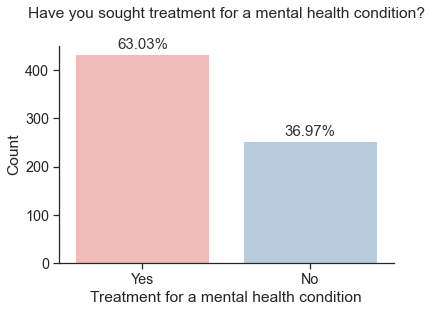

In [79]:
# reference: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
g = sns.barplot(data=treatment, x='treatment', y='count')

totals = []

for i in g.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in g.patches:
    g.text(i.get_x()+0.25, i.get_height()+10, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='0.2')
    
plt.ylim(0,450)    
plt.xlabel('Treatment for a mental health condition')
plt.ylabel('Count')
g.set_title('Have you sought treatment for a mental health condition?', y=1.1)

**Observations**
- Over half of respondents (after data cleaning) have sought treatment for a mental health condition

### Frequency of family history of mental illness

In [65]:
fam_hist = mh0['family_history'].value_counts().to_frame().rename_axis('family_history')
fam_hist = fam_hist.rename(columns={'family_history':'count'}).reset_index()
fam_hist['rel_freq'] = round(((fam_hist['count'] / fam_hist['count'].sum()) * 100),2)
fam_hist

,family_history,count,rel_freq
0,No,384,55.9
1,Yes,303,44.1


Text(0.5, 1.05, 'Do you have a family history of mental illness?')

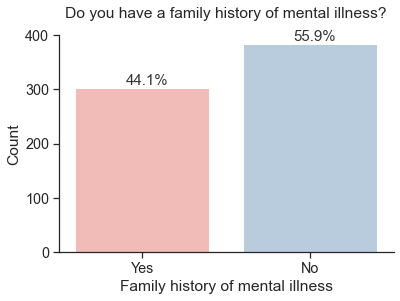

In [90]:
g = sns.barplot(data=fam_hist, x='family_history', y='count', order=['Yes', 'No'])

totals = []

for i in g.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in g.patches:
    g.text(i.get_x()+0.3, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='0.2')

plt.xlabel('Family history of mental illness')
plt.ylabel('Count')
plt.ylim(0,400)
g.set_title('Do you have a family history of mental illness?', y=1.05)

## Mental health issues interfering with work

In [67]:
interfere = mh0['work_interfere'].value_counts().to_frame().rename_axis('work_interfere')
interfere = interfere.rename(columns={'work_interfere':'count'}).reset_index()
interfere['rel_freq'] = round(((interfere['count'] / interfere['count'].sum()) * 100),2)
interfere

,work_interfere,count,rel_freq
0,Sometimes,328,47.74
1,Never,149,21.69
2,Rarely,124,18.05
3,Often,86,12.52


Text(0.5, 1.08, 'If you have a mental health condition, do you\nfeel that it interferes with your work?')

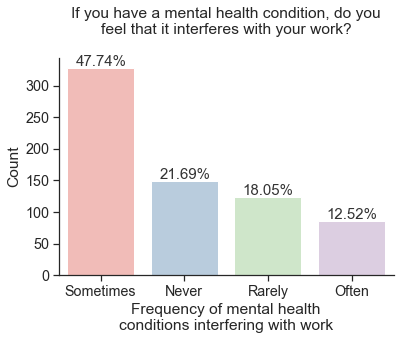

In [104]:
g = sns.barplot(data=interfere, x='work_interfere', y='count')

totals = []

for i in g.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in g.patches:
    g.text(i.get_x()+0.1, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='0.2')

plt.xlabel('Frequency of mental health\nconditions interfering with work', y=0.9)
plt.ylabel('Count')
g.set_title('If you have a mental health condition, do you\nfeel that it interferes with your work?', y=1.08)

In [116]:
mh0.groupby('treatment')['work_interfere'].value_counts().to_frame()

work_interfere
treatment work_interfere                
No        Never                      127
          Sometimes                   76
          Rarely                      36
          Often                       15
Yes       Sometimes                  252
          Rarely                      88
          Often                       71
          Never                       22

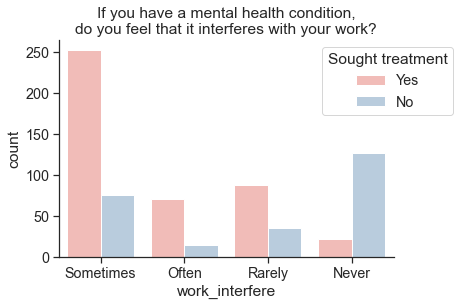

In [124]:
g = sns.countplot(data=mh0, x='work_interfere', hue='treatment')

plt.title('If you have a mental health condition,\ndo you feel that it interferes with your work?')
plt.legend(bbox_to_anchor=(1.2,1), title='Sought treatment')

**Observations:**
- Mental health interferes with work for more people who have sought treatment for a mental health issue than for people who have not sought treatment for a mental health issue.

## Knowledge of mental health resources

NameError: name 'sort_lb' is not defined

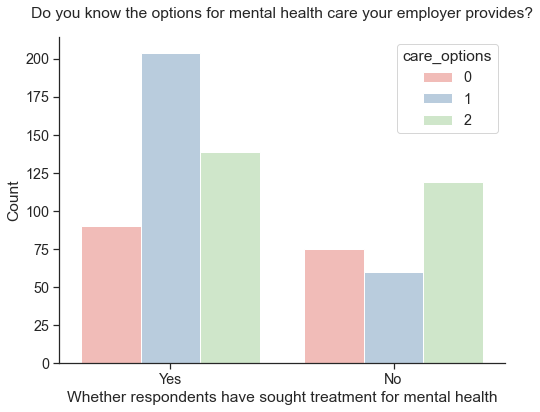

In [125]:
fig, ax = plt.subplots(figsize = (8, 6))
g = sns.countplot(data=mh0, x='treatment', hue='care_options')
plt.ylabel('Count') and plt.xlabel('Whether respondents have sought treatment for mental health')
plt.title("Do you know the options for mental health care your employer provides?", y=1.04)
g.legend(bbox_to_anchor=(1.2,1), labels=sort_lb)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.tight_layout(pad=4)

sns.countplot(data=mh0, x='treatment', hue='benefits', ax=ax[0])
ax[0].set_title('Does your employer provide\nmental health benefits?', y=1.05)
ax[0].legend(bbox_to_anchor=(1.2,1), labels=sort_lb)


sns.countplot(data=mh0, x='treatment', hue='care_options', ax=ax[1])
ax[1].set_title('Do you know the options for mental health\ncare your employer provides?', y=1.05)
ax[1].legend(bbox_to_anchor=(1.2,1), labels=sort_lb)


# Discussion and Conclusions

- Knowledge of what mental health resources are available seems to contribute to the improvement of handling mental health issues. Thus, employers might need to be more intentional about informing employees about the resources available.